<a href="https://colab.research.google.com/github/sumam121/CORIZO-PROJECTS/blob/main/Stock_Price_Prediction__using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


In [3]:
import yfinance as yfin


yfin.pdr_override()

apple = pdr.get_data_yahoo('AAPL', start='2010-10-31', end='2023-12-31')

print(apple)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-11-01   10.793571   10.914286   10.792857   10.863571    9.197095   
2010-11-02   10.964286   11.078214   10.964286   11.048571    9.353712   
2010-11-03   11.120357   11.174286   11.018929   11.171429    9.457726   
2010-11-04   11.266071   11.435000   11.251071   11.366786    9.623114   
2010-11-05   11.356786   11.413214   11.312500   11.326071    9.588648   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

               Volume  
Date         

In [4]:
apple.head(5)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-11-01  10.793571  10.914286  10.792857  10.863571   9.197095  423889200
2010-11-02  10.964286  11.078214  10.964286  11.048571   9.353712  433930000
2010-11-03  11.120357  11.174286  11.018929  11.171429   9.457726  508348400
2010-11-04  11.266071  11.435000  11.251071  11.366786   9.623114  642488000
2010-11-05  11.356786  11.413214  11.312500  11.326071   9.588648  361253200

In [5]:
apple.tail(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

              Volume  
Date                  
2023-12-22  37122800  
2023-12-26  28919300  
2023-12-27  48087700  
2023-12-28  34049900  
2023-12-29  42628800

In [6]:
df=apple.reset_index()
df.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2010-11-01  10.793571  10.914286  10.792857  10.863571   9.197095  423889200
1 2010-11-02  10.964286  11.078214  10.964286  11.048571   9.353712  433930000
2 2010-11-03  11.120357  11.174286  11.018929  11.171429   9.457726  508348400
3 2010-11-04  11.266071  11.435000  11.251071  11.366786   9.623114  642488000
4 2010-11-05  11.356786  11.413214  11.312500  11.326071   9.588648  361253200

In [7]:
df =df.drop(['Date','Adj Close'],axis=1)

In [8]:
df.head(4)

Open       High        Low      Close     Volume
0  10.793571  10.914286  10.792857  10.863571  423889200
1  10.964286  11.078214  10.964286  11.048571  433930000
2  11.120357  11.174286  11.018929  11.171429  508348400
3  11.266071  11.435000  11.251071  11.366786  642488000

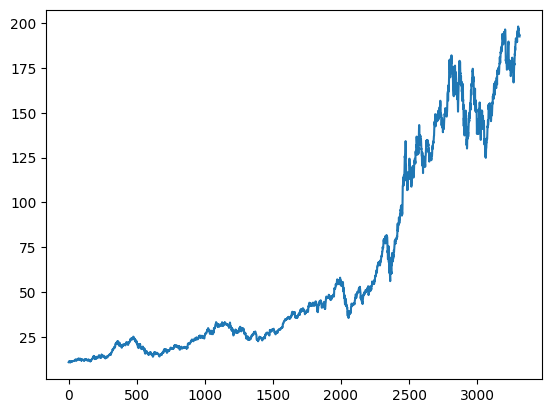

In [9]:
plt.plot(df.Close)

In [10]:
df

Open        High         Low       Close     Volume
0      10.793571   10.914286   10.792857   10.863571  423889200
1      10.964286   11.078214   10.964286   11.048571  433930000
2      11.120357   11.174286   11.018929   11.171429  508348400
3      11.266071   11.435000   11.251071   11.366786  642488000
4      11.356786   11.413214   11.312500   11.326071  361253200
...          ...         ...         ...         ...        ...
3308  195.179993  195.410004  192.970001  193.600006   37122800
3309  193.610001  193.889999  192.830002  193.050003   28919300
3310  192.490005  193.500000  191.089996  193.149994   48087700
3311  194.139999  194.660004  193.169998  193.580002   34049900
3312  193.899994  194.399994  191.729996  192.529999   42628800

[3313 rows x 5 columns]

In [11]:
m100=df.Close.rolling(100).mean()
m100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3308    181.768301
3309    181.787101
3310    181.898701
3311    182.046001
3312    182.173301
Name: Close, Length: 3313, dtype: float64

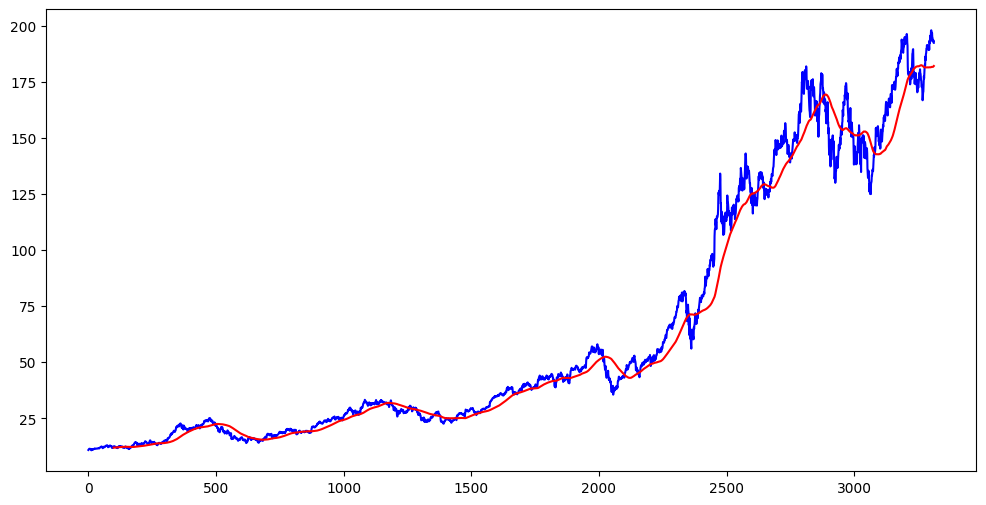

In [12]:
plt.figure(figsize =(12,6))
plt.plot(df.Close,'b')
plt.plot(m100,'r')


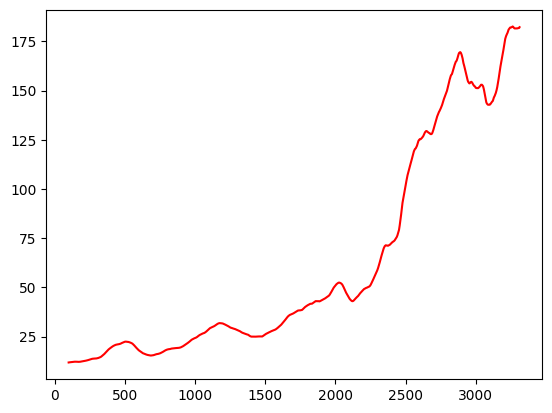

In [13]:
plt.plot(m100,'r')

In [14]:
m200=df.Close.rolling(200).mean()
m200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3308    178.649100
3309    178.871851
3310    179.085250
3311    179.290201
3312    179.487900
Name: Close, Length: 3313, dtype: float64

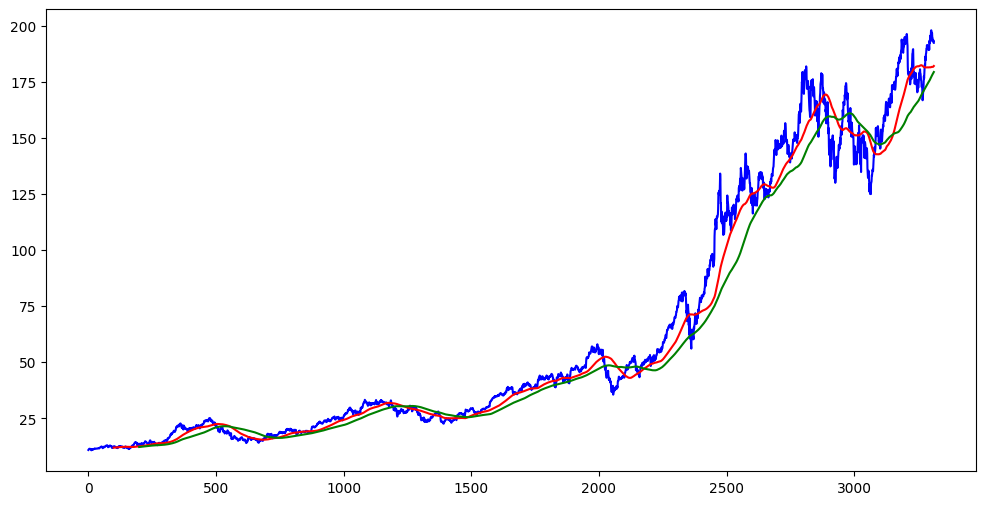

In [15]:
plt.figure(figsize =(12,6))
plt.plot(df.Close,'b')
plt.plot(m100,'r')
plt.plot(m200,'g')

In [16]:
df.shape

(3313, 5)

In [17]:
# Spltting data into train & test:
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_train.shape,data_test.shape)

(2319, 1) (994, 1)


In [18]:
data_train.head(),data_test.head()

(       Close
 0  10.863571
 1  11.048571
 2  11.171429
 3  11.366786
 4  11.326071,
           Close
 2319  79.142502
 2320  79.425003
 2321  79.807503
 2322  79.577499
 2323  77.237503)

In [19]:
# DATA SCALING
# MIN_MAX SCALER
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [20]:
data_train_array=scaler.fit_transform(data_train)

In [21]:
data_train_array.shape

(2319, 1)

In [22]:
x_train=[]
y_train =[]

for i in range(100,data_train_array.shape[0]):
  x_train.append(data_train_array[i-100:i])
  y_train.append(data_train_array[i,0])
x_train

[array([[0.00190612],
        [0.0045892 ],
        [0.00637104],
        [0.00920434],
        [0.00861384],
        [0.00938563],
        [0.00806998],
        [0.00908002],
        [0.00836524],
        [0.00390031],
        [0.00338752],
        [0.00056458],
        [0.        ],
        [0.0041075 ],
        [0.00322696],
        [0.00666111],
        [0.00426288],
        [0.00740697],
        [0.00751057],
        [0.00847918],
        [0.00551639],
        [0.00823573],
        [0.00914218],
        [0.00877442],
        [0.01017813],
        [0.00917326],
        [0.01062357],
        [0.00997611],
        [0.01039049],
        [0.01096543],
        [0.01025064],
        [0.0102869 ],
        [0.01074789],
        [0.01041639],
        [0.01124514],
        [0.0122759 ],
        [0.01277315],
        [0.01196513],
        [0.01252452],
        [0.01293373],
        [0.0128405 ],
        [0.01199621],
        [0.01142644],
        [0.01505741],
        [0.01594833],
        [0

In [23]:
y_train

[0.02643723572155743,
 0.025867454594412392,
 0.02613680567269913,
 0.024929926395813706,
 0.024867782285988155,
 0.02282178463498849,
 0.021076230864164686,
 0.019884897988223793,
 0.019444619487452325,
 0.01946535263248425,
 0.01790107210968478,
 0.015694520524375116,
 0.01652327924163219,
 0.018455306835885282,
 0.016533625067171792,
 0.013964485491860745,
 0.01623838176240086,
 0.019351396407055244,
 0.021708156101135273,
 0.026002130133555762,
 0.02719864975358402,
 0.02585710876887276,
 0.025717246485642026,
 0.023956160145191224,
 0.025706900660102394,
 0.02371270129338865,
 0.024707200689043057,
 0.025416830268101293,
 0.023956160145191224,
 0.023909534773675106,
 0.02439642481464513,
 0.025354672326958178,
 0.024204764247128474,
 0.023862909402159016,
 0.020718829618250667,
 0.016989436137570285,
 0.018460479748655084,
 0.020392507342908178,
 0.020734376019195228,
 0.017983949364542257,
 0.017559203433397758,
 0.016414495928972983,
 0.018791974936767375,
 0.01786999313911325,


In [24]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train.shape

(2219, 100, 1)

In [26]:
y_train.shape

(2219,)

In [27]:
# ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [28]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu',))
model.add(Dropout(0.5))


model.add(Dense(units=1))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
70/70 [==============================] - 53s 526ms/step - loss: 0.0201
Epoch 2/50
70/70 [==============================] - 54s 771ms/step - loss: 0.0045
Epoch 3/50
70/70 [==============================] - 33s 470ms/step - loss: 0.0038
Epoch 4/50
70/70 [==============================] - 45s 645ms/step - loss: 0.0038
Epoch 5/50
70/70 [==============================] - 34s 491ms/step - loss: 0.0032
Epoch 6/50
70/70 [==============================] - 33s 468ms/step - loss: 0.0031
Epoch 7/50
70/70 [==============================] - 33s 471ms/step - loss: 0.0030
Epoch 8/50
70/70 [==============================] - 33s 471ms/step - loss: 0.0032
Epoch 9/50
70/70 [==============================] - 33s 470ms/step - loss: 0.0029
Epoch 10/50
70/70 [==============================] - 33s 475ms/step - loss: 0.0030
Epoch 11/50
70/70 [==============================] - 32s 455ms/step - loss: 0.0032
Epoch 12/50
70/70 [==============================] - 34s 487ms/step - loss: 0.0032
Epoch 13/50
7

In [ ]:
model.save('keras_model_stock_pred')

In [31]:
data_test.head()

Close
2319  79.142502
2320  79.425003
2321  79.807503
2322  79.577499
2323  77.237503

In [32]:
past_100_days=data_train.tail(100)

In [33]:
final_df=past_100_days.append(data_test,ignore_index=True)

<ipython-input-33-f3fd9580a1f0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [34]:
final_df.head()

Close
0  51.040001
1  51.382500
2  52.252499
3  52.185001
4  51.424999

In [35]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00232881],
       [0.00824436],
       ...,
       [0.96627452],
       [0.96919835],
       [0.96205887]])

In [36]:
input_data.shape

(1094, 1)

In [38]:
x_test= []
y_test=[]

In [39]:
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [42]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(994, 100, 1)
(994,)


In [43]:
y_pred=model.predict(x_test)

32/32 [==============================] - 3s 63ms/step


In [44]:
y_pred.shape

(994, 1)

In [45]:
y_test

array([0.19108248, 0.19300335, 0.19560415, 0.19404024, 0.17812948,
       0.19298633, 0.20429046, 0.20349152, 0.1790814 , 0.1776365 ,
       0.19495819, 0.19937786, 0.20576934, 0.19696402, 0.19954781,
       0.19625005, 0.20915212, 0.20519139, 0.20532741, 0.19521316,
       0.20306655, 0.19742297, 0.18509891, 0.15982184, 0.14265313,
       0.15042155, 0.11790301, 0.11763103, 0.16089276, 0.144761  ,
       0.16757324, 0.15088055, 0.14426803, 0.10540901, 0.1379955 ,
       0.12114977, 0.07491329, 0.12546746, 0.06468009, 0.0827837 ,
       0.0722615 , 0.06904874, 0.04263276, 0.03435437, 0.07261848,
       0.07030666, 0.09226899, 0.07408037, 0.08609845, 0.08521451,
       0.06247025, 0.06930371, 0.06332019, 0.09911946, 0.09395184,
       0.10523901, 0.10850273, 0.11744407, 0.14090226, 0.13644861,
       0.14029034, 0.13367781, 0.12369958, 0.10914869, 0.12228871,
       0.12046984, 0.13396681, 0.13430681, 0.12650436, 0.14205822,
       0.15237639, 0.14433604, 0.1512885 , 0.15876792, 0.16398

In [46]:
y_test

array([0.19108248, 0.19300335, 0.19560415, 0.19404024, 0.17812948,
       0.19298633, 0.20429046, 0.20349152, 0.1790814 , 0.1776365 ,
       0.19495819, 0.19937786, 0.20576934, 0.19696402, 0.19954781,
       0.19625005, 0.20915212, 0.20519139, 0.20532741, 0.19521316,
       0.20306655, 0.19742297, 0.18509891, 0.15982184, 0.14265313,
       0.15042155, 0.11790301, 0.11763103, 0.16089276, 0.144761  ,
       0.16757324, 0.15088055, 0.14426803, 0.10540901, 0.1379955 ,
       0.12114977, 0.07491329, 0.12546746, 0.06468009, 0.0827837 ,
       0.0722615 , 0.06904874, 0.04263276, 0.03435437, 0.07261848,
       0.07030666, 0.09226899, 0.07408037, 0.08609845, 0.08521451,
       0.06247025, 0.06930371, 0.06332019, 0.09911946, 0.09395184,
       0.10523901, 0.10850273, 0.11744407, 0.14090226, 0.13644861,
       0.14029034, 0.13367781, 0.12369958, 0.10914869, 0.12228871,
       0.12046984, 0.13396681, 0.13430681, 0.12650436, 0.14205822,
       0.15237639, 0.14433604, 0.1512885 , 0.15876792, 0.16398

In [47]:
scaler.scale_

array([0.00679948])

In [48]:
scle_factor=1/0.00679948
y_pred=y_pred *scle_factor
y_test=y_test *scle_factor

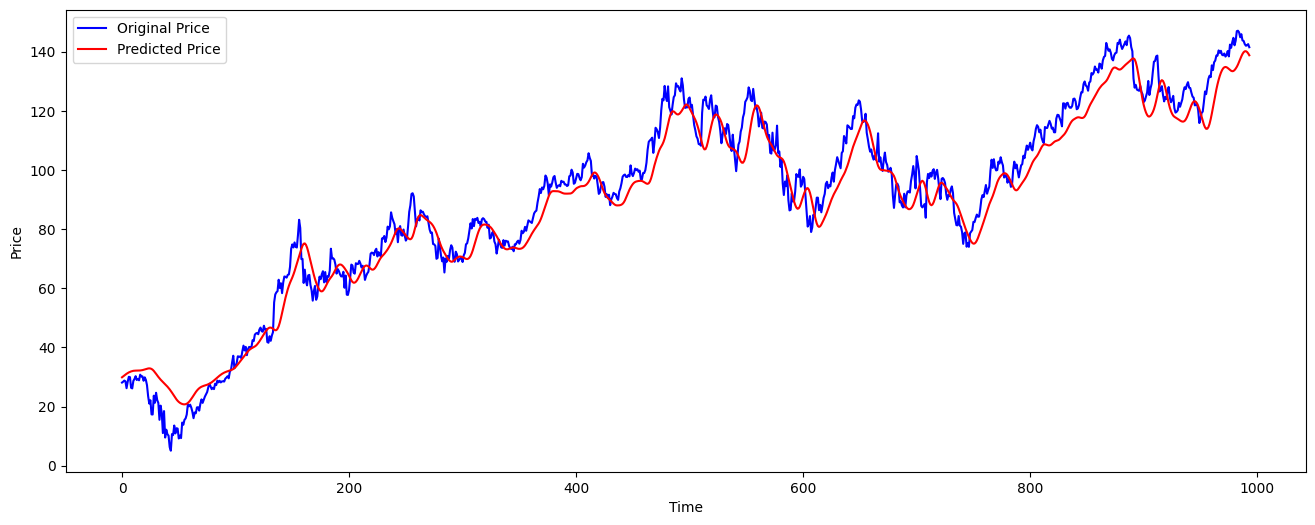

In [51]:
plt.figure(figsize=(16,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()